# Feature Scaling and Its Impact on k-NN Accuracy

In this notebook, we explore the effect of different feature scaling techniques on the performance of a k-Nearest Neighbors (k-NN) classifier using the **Breast Cancer** dataset from scikit-learn.

###  Objectives:
- Understand the role of feature scaling in machine learning
- Compare the impact of:
  - No scaling
  - StandardScaler
  - MinMaxScaler
  - RobustScaler
- Visualize how scaling affects k-NN classifier accuracy


##  Step 1: Import Required Libraries

We begin by importing essential libraries for data processing, machine learning, and visualization.


In [10]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score


## Step 2: Load and Explore the Breast Cancer Dataset

We load the Breast Cancer dataset, which includes numeric features such as radius, texture, area, etc. These features are on different scales, which makes it a great dataset for scaling experiments.


In [8]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


##  Step 3: Train-Test Split

We divide the dataset into a training set and a test set using a 70/30 split.  
Stratification ensures class distribution remains consistent across both sets.


In [16]:
# Train-test split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

##  Step 4: Define Feature Scaling Methods

We use three popular scaling techniques:
- **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.
- **MinMaxScaler**: Scales features to a specified range, usually [0, 1].
- **RobustScaler**: Scales features using statistics that are robust to outliers (median and IQR).


In [19]:
# Define scalers
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()
scaler_rb = RobustScaler()

# Function to evaluate model accuracy
def evaluate_knn(X_train, X_test, name):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    return acc


## Step 5: Evaluate k-NN Classifier with Each Scaling Method

We define a helper function to train and test a k-NN classifier (`k=5`) for each version of the dataset:
- Unscaled
- Standard Scaled
- Min-Max Scaled
- Robust Scaled

We compute and print the test accuracy for each.


In [22]:
# Evaluate with and without scaling
acc_unscaled = evaluate_knn(X_train_orig, X_test_orig, "Unscaled")
acc_std = evaluate_knn(scaler_std.fit_transform(X_train_orig), scaler_std.transform(X_test_orig), "StandardScaler")
acc_mm = evaluate_knn(scaler_mm.fit_transform(X_train_orig), scaler_mm.transform(X_test_orig), "MinMaxScaler")
acc_rb = evaluate_knn(scaler_rb.fit_transform(X_train_orig), scaler_rb.transform(X_test_orig), "RobustScaler")


Unscaled Accuracy: 0.9240
StandardScaler Accuracy: 0.9591
MinMaxScaler Accuracy: 0.9708
RobustScaler Accuracy: 0.9532


## Step 6: Visualize Accuracy Results

We summarize the results with a bar plot to show the comparative accuracy of k-NN using different feature scaling methods.
This helps us understand which scaler leads to better model performance.


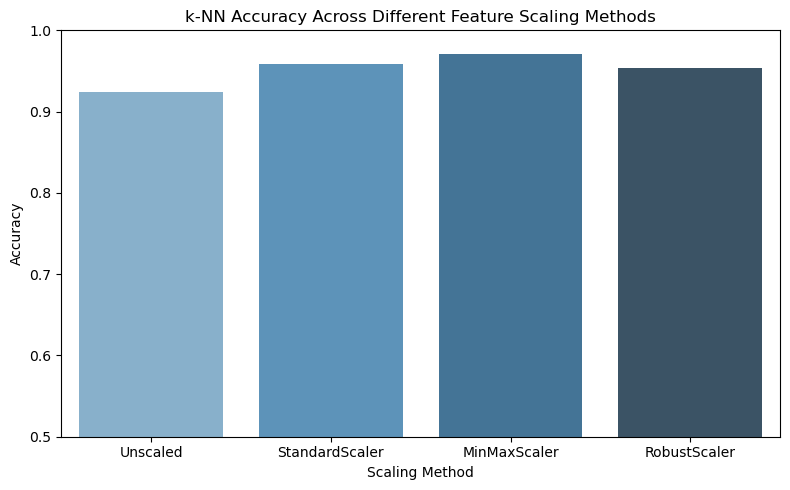

In [27]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Plotting results
scaling_methods = ["Unscaled", "StandardScaler", "MinMaxScaler", "RobustScaler"]
accuracies = [acc_unscaled, acc_std, acc_mm, acc_rb]

plt.figure(figsize=(8, 5))
sns.barplot(x=scaling_methods, y=accuracies, palette="Blues_d")
plt.ylim(0.5, 1.0)
plt.title("k-NN Accuracy Across Different Feature Scaling Methods")
plt.ylabel("Accuracy")
plt.xlabel("Scaling Method")
plt.tight_layout()
plt.show()
